In [0]:
# Importing the libraries.
import pandas as pd
import numpy as np
import nltk
import spacy

import seaborn as sns


In [36]:
# Reading in the data.
df = pd.read_csv("Job Details.csv", encoding='latin-1') 
df.head()

,Job Id,Job Title,Keywords,Minimum Experience in years,Maximum Experience in Years,Minimum Annual Salary,Maximum Annual Salary,Currency,Must Haves,Company Name,Founded Year,Employee Count,Job Location,Industry,Function,Required Education (UG),Required Education (PG),Notice Period (Days)
0,194,Full stack engineer,"java,Angular,Jquery,j2ee,microservices,micro s...",2,5,6,15,INR,NaN,Company X,2011,362,Hyderabad,IT | Computer Software,IT Software,B.Tech/B.E.,NaN,60
1,481,Senior Java Engineer/Tech Lead,"J2EE,Java,Hibernate,Webervices,REST Services,S...",7,10,10,15,INR,Should have proficient Java server side progra...,Company X,2011,362,Hyderabad,IT | Computer Software,IT Software,Other UG,Not Required,30
2,839,Front End Developer,NaN,2,5,4,8,INR,The candidate must have at least 2 years of so...,Company X,2011,362,Bengaluru/Bangalore,IT | Information Technology and Services,IT Software,Undergraduate (engineering),NaN,30
3,723,Application Developer,"c#, asp.net, sql, java, html5",3,8,4,9,INR,The Application Developer is a role within the...,Company X,2011,362,Bengaluru,IT | Information Technology and Services,IT Software,B.Tech/B.E.,NaN,30


## Data exploration

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Job Id                       4 non-null      int64 
 1   Job Title                    4 non-null      object
 2   Keywords                     3 non-null      object
 3   Minimum Experience in years  4 non-null      int64 
 4   Maximum Experience in Years  4 non-null      int64 
 5   Minimum Annual Salary        4 non-null      int64 
 6   Maximum Annual Salary        4 non-null      int64 
 7   Currency                     4 non-null      object
 8   Must Haves                   3 non-null      object
 9   Company Name                 4 non-null      object
 10  Founded Year                 4 non-null      int64 
 11  Employee Count               4 non-null      int64 
 12  Job Location                 4 non-null      object
 13  Industry                     4 non-null

In [38]:
df.isnull().sum()

Job Id                         0
Job Title                      0
Keywords                       1
Minimum Experience in years    0
Maximum Experience in Years    0
Minimum Annual Salary          0
Maximum Annual Salary          0
Currency                       0
Must Haves                     1
Company Name                   0
Founded Year                   0
Employee Count                 0
Job Location                   0
Industry                       0
Function                       0
Required Education (UG)        0
Required Education (PG)        3
Notice Period (Days)           0
dtype: int64

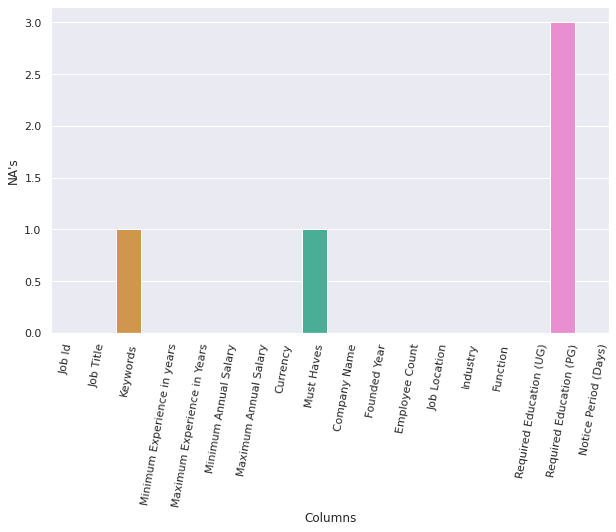

In [39]:
# Visualize missing values

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = df.columns
y = df.isnull().sum()
plt.figure(figsize=(10,6))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
ax.set_xlabel("Columns")
ax.set_ylabel("NA's")
plt.xticks(rotation=80)

plt.show()

Relocation cities has the most missing values, followed by current annual salary.

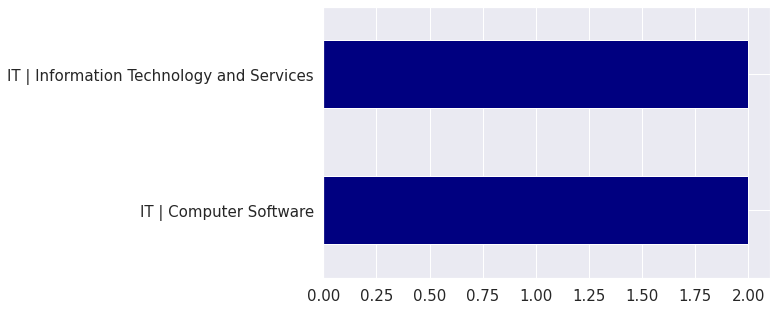

In [40]:
# Checking popular industries the job applicants are currently in.
df['Industry'].value_counts()[0:10].plot(kind='barh', figsize=[8,5],fontsize=15,color='navy').invert_yaxis()


- Most applicants are from the IT| Computer Software

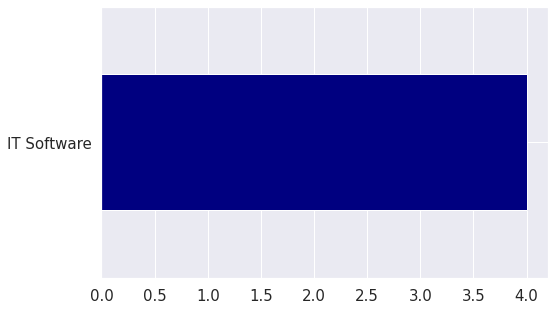

In [41]:
df['Function'].value_counts()[0:10].plot(kind='barh', figsize=[8,5],fontsize=15,color='navy').invert_yaxis()

- Most applicants were in the IT|Software department in the companies that they worked previously

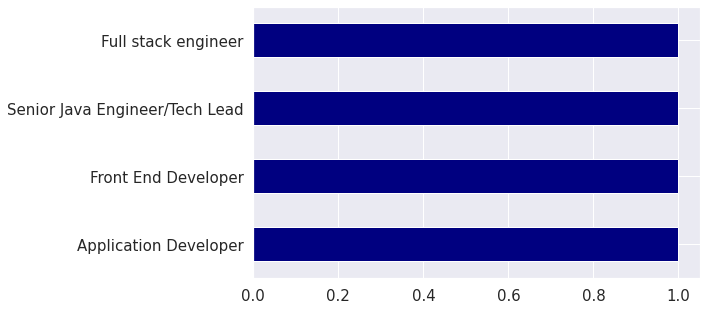

In [42]:
df['Job Title'].value_counts()[0:10].plot(kind='barh', figsize=[8,5],fontsize=15,color='navy').invert_yaxis()

- Most of the applicants have the title Software engineer

In [47]:
# Plot to see how the job data source
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Data Source',data=df,)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

ValueError: ignored

<Figure size 720x360 with 0 Axes>

- The company received most job appications from indeed.com

In [48]:
# Selecting the necessary columns
cols = ['Candidate Id']+['Location']+['Industry']+['Function']+['Job Title']
df =df[cols]
df.head()

KeyError: ignored

In [0]:
# Text corpus creation.

df= df.fillna(" ")

In [50]:
df["text"] = df["Location"].map(str) + " " + df["Industry"] +" "+ df[" Function"]+ " "+df['Job Title']
df.head(2)

KeyError: ignored

In [0]:
df_all = df[["Candidate Id", "text"]]
df_all.head()

In [0]:
fd = pd.read_csv("jobs all.csv", encoding="latin_1")
fd.head()

In [0]:
cols = ['Job Id']+['Job Title']+['Keywords']+['Job Location']+['Industry']+["Function"]+["Required Education (PG)"]
fd =fd[cols]
fd.head()

In [0]:
fd= fd.fillna(" ")

In [0]:
fd["text_job"] = fd['Job Title'].map(str) + " " + fd['Keywords']+ " "+fd['Job Location']+ " "+fd['Industry']+ " "+fd["Function"]+ " "+fd["Required Education (PG)"]
fd.head(2)

In [0]:
fd_all = fd[["Job Id", "text_job"]]

In [0]:
fd_all

In [0]:
fd_all = fd_all.rename(columns={'Job Id': 'Candidate Id', 'text_job': 'text'})
df_final = pd.concat([df_all, fd_all])
df_final.reset_index(inplace=True, drop=True) 

In [0]:
df_final.tail()

In [0]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


In [0]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text) 
    text = text.replace("nbsp", "")
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [0]:
df_final['text'] = df_final['text'].apply(clean_txt) 

# Building recommender system

In [0]:
df_final["Candidate Id"] = df_final["Candidate Id"].astype("str") 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df_final["text"])

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(counts, counts)
print(cosine_sim)

In [0]:
cosine_sim.shape

In [0]:
indices = pd.Series(df_final['Candidate Id'])
indices

In [0]:
# idx = indices[indices == '194'].index[0]
# cosine_sim[idx]
# scores = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
# indices = scores.iloc[1:].index
# indices = list(indices)



In [0]:
# this function takes in a job index as input and returns the candidates in order of cosine similarity.

def recommend(candidate_id, cosine_sim = cosine_sim):
    recommended_candidates = []
    idx = indices[indices == candidate_id].index[0]   # to get the index of the job title matching the candidate
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)   # similarity scores in descending order
    top_indices = list(score_series.iloc[1:].index)   # to get the indices of  most similar candidates
    # [1:] to exclude 0 (index 0 is the input job)
    
    for i in top_indices:   # to append the candidates whos profil matches the job.
        recommended_candidates.append(df_final['Candidate Id'][i])
        
    return recommended_candidates




# JOB 1 SCORES

In [0]:
candidates = recommend("194")
candidates  

In [0]:
idx = indices[indices == '194'].index[0]
cosine_sim[idx]
scores_job1 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

In [0]:
scores_job1 = list(scores_job1[1:])
scores_job1

In [0]:
df_job1 = pd.DataFrame(list(zip(candidates, scores_job1)), 
               columns =['candidate', 'scores_job1']) 
# Score for job 1
df_job1.head(20)


#  JOB 2 SCORES

In [0]:
candidates = recommend("481")
candidates  

In [0]:
idx = indices[indices == '481'].index[0]
cosine_sim[idx]
scores_job2 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

In [0]:
scores_job2 = list(scores_job2[1:])
scores_job2

In [0]:
df_job2 = pd.DataFrame(list(zip(candidates, scores_job2)), 
               columns =['candidate', 'scores_job2']) 
# Score for job 1
df_job2.head(20)


#  JOB 3 SCORES

In [0]:
candidates = recommend("839")
candidates  

In [0]:
idx = indices[indices == '839'].index[0]
cosine_sim[idx]
scores_job3 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

In [0]:
scores_job3 = list(scores_job3[1:])
scores_job3

In [0]:
df_job3 = pd.DataFrame(list(zip(candidates, scores_job3)), 
               columns =['candidate', 'scores_job3']) 
# Score for job 1
df_job3.head(20)


#  JOB 4 SCORES

In [0]:
candidates = recommend("723")
candidates  

In [0]:
idx = indices[indices == '723'].index[0]
cosine_sim[idx]
scores_job4 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

In [0]:
scores_job4 = list(scores_job4[1:])
scores_job4

In [0]:
df_job4 = pd.DataFrame(list(zip(candidates, scores_job4)), 
               columns =['candidate', 'scores_job4']) 
# Score for job 1
df_job4.head(20)


#  JOINING THE 4 DATA FRAMES ON THE CANDIDATES COLUMN

In [0]:
# jobs 1 and 2 merge
df_jobs12 = df_job1.merge(df_job2, left_on='candidate', right_on='candidate', how='outer')

# jobs 1,2 and 3 merge
df_jobs123 = df_jobs12.merge(df_job3, left_on='candidate', right_on='candidate', how='outer')

# jobs 1,2,3 and 4 merge.
df_jobs1234 = df_jobs123.merge(df_job4, left_on='candidate', right_on='candidate', how='outer') 
df_jobs1234.head(20)                             


In [0]:
df_jobs1234[df_jobs1234['candidate']=="194"]

In [0]:
df_jobs1234[df_jobs1234['candidate']=="481"]

In [0]:
df_jobs1234[df_jobs1234['candidate']=="839"]

In [0]:
df_jobs1234[df_jobs1234['candidate']=="723"]

In [0]:
# The jobs in the candidte column are easily identifiable since they have null values.
# They will be dropped so as to remain with the real candidates.
df_jobs1234 = df_jobs1234.dropna()

# The data now only contains the candidates

In [0]:
# Ranking the data.
# If the employer wants to shortlist top 20 candidates for job 1, 
# He will just order the data in descending order using the column scores_job1 as follows.
df_jobs1234 = df_jobs1234.sort_values(by='scores_job1', ascending=False)
df_jobs1234.head(20)

In [0]:
# Analysing the first 3 picked individuals.

df[df['Candidate Id']=="A12828"]


In [0]:
df[df['Candidate Id']=="A13064"]


In [0]:
df[df['Candidate Id']=="A14020"]

In [0]:
fd[fd['Job Id'] == 194]

- The 3 candidates have very similar resumes, explaining why they must have got similar scores.
- The candidates are also ranked highest because their similar are most similar to the jo1 description as shown above


In [0]:
# Creating an array with the colours
colors = ["#FC6600", "#FFFF00", "#CC7722", "#964000", "#AEFF19"]
# Setting your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = df_job1.head(), x = "candidate", y = "scores_job1", palette=colors)
plt.title ("Full_stack_engineer")


In [0]:
sns.barplot(data = df_job2.head(), x = "candidate", y = "scores_job2", palette="colorblind")
plt.title ("Senior_Java_Engineer_Tech_Lead")

In [0]:
sns.barplot(data = df_job3.head(), x = "candidate", y = "scores_job3", palette = "Paired") 
plt.title ('Front_End_Developer') 

In [0]:
sns.barplot(data = df_job4.head(), x = "candidate", y = "scores_job4", palette = "dark")
plt.title ("Application_Developer")

In [0]:
w = df_jobs1234['scores_job1'].sort_values(ascending = False)
a = df_jobs1234['candidate'][w.iloc[0:5].index]
a = list(a)
x = df_jobs1234['scores_job2'].sort_values(ascending = False)
b = df_jobs1234['candidate'][x.iloc[0:5].index]
b = list(b)
y = df_jobs1234['scores_job3'].sort_values(ascending = False)
c = df_jobs1234['candidate'][y.iloc[0:5].index] 
c = list(c)
z = df_jobs1234['scores_job4'].sort_values(ascending = False)
d = df_jobs1234['candidate'][z.iloc[0:5].index]
d = list(d)

In [0]:
shortlist = pd.DataFrame(list(zip(a, b, c, d)), 
               columns =['Full_stack_engineer', 'Senior_Java_Engineer_Tech_Lead', 'Front_End_Developer','Application_Developer']) 
shortlist


# USING TF  - IDF

In [0]:
#Importing TfidfVectorizer library

from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
#Initialize tfidf vectorizer

tfidf_vectorizer = TfidfVectorizer()

counts_tfidf= tfidf_vectorizer.fit_transform(df_final["text"]) #fitting and transforming the vector
counts_tfidf

In [0]:
cosine_sim = cosine_similarity(counts_tfidf, counts_tfidf)
print(cosine_sim)

## job score 1 - tfidf

In [0]:
candidates = recommend("194")
idx = indices[indices == '194'].index[0]
cosine_sim[idx]
scores_job1 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
scores_job1 = list(scores_job1[1:])
df_job1 = pd.DataFrame(list(zip(candidates, scores_job1)), 
               columns =['candidate', 'scores_job1']) 
# Score for job 1
df_job1.head(20)

## Job score 2

In [0]:
candidates = recommend("481")
idx = indices[indices == '481'].index[0]
cosine_sim[idx]
scores_job2 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
scores_job2 = list(scores_job2[1:])
df_job2 = pd.DataFrame(list(zip(candidates, scores_job2)), 
               columns =['candidate', 'scores_job2']) 
# Score for job 1
df_job2.head(20)

In [0]:
candidates = recommend("839")
idx = indices[indices == '839'].index[0]
cosine_sim[idx]
scores_job3 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
scores_job3 = list(scores_job3[1:])
df_job3 = pd.DataFrame(list(zip(candidates, scores_job3)), 
               columns =['candidate', 'scores_job3']) 
# Score for job 1
df_job3.head(20)

In [0]:
candidates = recommend("723")
idx = indices[indices == '723'].index[0]
cosine_sim[idx]
scores_job4 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
scores_job4 = list(scores_job4[1:])
df_job4 = pd.DataFrame(list(zip(candidates, scores_job4)), 
               columns =['candidate', 'scores_job4']) 
# Score for job 1
df_job4.head(20)

In [0]:
w = df_jobs1234['scores_job1'].sort_values(ascending = False)
a = df_jobs1234['candidate'][w.iloc[0:5].index]
a = list(a)
x = df_jobs1234['scores_job2'].sort_values(ascending = False)
b = df_jobs1234['candidate'][x.iloc[0:5].index]
b = list(b)
y = df_jobs1234['scores_job3'].sort_values(ascending = False)
c = df_jobs1234['candidate'][y.iloc[0:5].index] 
c = list(c)
z = df_jobs1234['scores_job4'].sort_values(ascending = False)
d = df_jobs1234['candidate'][z.iloc[0:5].index]
d = list(d)

In [0]:
shortlist = pd.DataFrame(list(zip(a, b, c, d)), 
               columns =['Full_stack_engineer', 'Senior_Java_Engineer_Tech_Lead', 'Front_End_Developer','Application_Developer']) 
shortlist


using the tf - idf, we got different scores, but the recommendation for candidates to be shortlisted remained constant